In [71]:
#Memasukkan Data
import pandas as pd
df_train = pd.read_excel('training.xlsx', sheet_name='Sheet1')
df_train.head()

,Date,Title,Summary,Sentiment
0,2021-12-10,Sengketa tanah muncul setelah Sepaku-Penajam d...,Penetapan sebagian wilayah di Kabupaten Penaja...,Negative
1,2021-12-14,"Satgas Pembangunan Ibu Kota Baru Terbentuk, Di...",Mantan Direktur Jenderal Cipta Karya Kementeri...,Neutral
2,2021-12-10,"Pansus RUU IKN Bengkak usai Aturan Diubah, Bal...","Wakil Ketua Badan Legislasi (Baleg) DPR RI, Ac...",Negative
3,2021-12-16,IKN Baru Jangan Bikin Luka Baru,"Menteri Pekerjaan Umum dan Perumahan Rakyat, B...",Positive
4,2021-12-27,Refleksi Akhir Tahun KAMI Lintas Provinsi: Pem...,"Dalam keterangan berjudul ""Refleksi Akhir Tahu...",Positive


In [72]:
df_test = pd.read_excel('testing.xlsx', sheet_name='Sheet1')
df_test.head()

,Date,Title,Summary,Sentiment
0,2021-12-14,Ketua KI Pusat hadir malam anugrah sekaligus i...,Ketua Komisi Informasi (KI) Pusat Gede Narayan...,Neutral
1,2021-12-17,"Ramal Gempa dan Tsunami Hantam Pulau Jawa, Den...",Ahli Tarot Denny Darko meramalkan gempa bumi d...,Negative
2,2021-11-28,Pemkot Balikpapan rencanakan bangun pasar induk,"Pemerintah Kota (Pemkot)Balikpapan, Kalimantan...",Neutral
3,2021-12-15,Kapan PNS Pindah ke Ibu Kota Baru di Kalimanta...,Para Pegawai Negeri Sipil (PNS) dikabarkan aka...,Neutral
4,2021-12-24,"Pamer Design Ibu Kota Baru di Kalimantan, Pres...","Ibu kota negara baru di Penajam Paser Utara, K...",Neutral


In [73]:
df_train=df_train[['Summary','Sentiment']]
df_train['Summary']=df_train.Summary.astype('str')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Summary    1051 non-null   object
 1   Sentiment  1051 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
df_test=df_test[['Summary','Sentiment']]
df_test['Summary']=df_test.Summary.astype('str')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Summary    451 non-null    object
 1   Sentiment  451 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df_train['Sentiment'].value_counts()

Neutral     499
Positive    335
Negative    217
Name: Sentiment, dtype: int64

In [77]:
df_test['Sentiment'].value_counts()

Neutral     214
Positive    144
Negative     93
Name: Sentiment, dtype: int64

In [78]:
#Melakukan One Hot Encodding dan Menghapus Kolom Sentiment pada Data Train
sentimen = pd.get_dummies(df_train.Sentiment)
df_trainbaru = pd.concat([df_train, sentimen], axis=1)
df_trainbaru = df_trainbaru.drop(columns='Sentiment')
df_trainbaru

,Summary,Negative,Neutral,Positive
0,Penetapan sebagian wilayah di Kabupaten Penaja...,1,0,0
1,Mantan Direktur Jenderal Cipta Karya Kementeri...,0,1,0
2,"Wakil Ketua Badan Legislasi (Baleg) DPR RI, Ac...",1,0,0
3,"Menteri Pekerjaan Umum dan Perumahan Rakyat, B...",0,0,1
4,"Dalam keterangan berjudul ""Refleksi Akhir Tahu...",0,0,1
...,...,...,...,...
1046,Beragam peristiwa bidang politik terjadi di In...,0,1,0
1047,Ketua Panitia Khusus (Pansus) Ibu Kota Negara ...,0,1,0
1048,JAKARTA- Pengamat politik dari Universitas Al ...,0,1,0
1049,Menteri Pekerjaan Umum dan Perumahan Rakyat at...,0,1,0


In [79]:
#Melakukan One Hot Encodding dan Menghapus Kolom Sentiment pada Data Test
sentimen = pd.get_dummies(df_test.Sentiment)
df_testbaru = pd.concat([df_test, sentimen], axis=1)
df_testbaru = df_testbaru.drop(columns='Sentiment')
df_testbaru

,Summary,Negative,Neutral,Positive
0,Ketua Komisi Informasi (KI) Pusat Gede Narayan...,0,1,0
1,Ahli Tarot Denny Darko meramalkan gempa bumi d...,1,0,0
2,"Pemerintah Kota (Pemkot)Balikpapan, Kalimantan...",0,1,0
3,Para Pegawai Negeri Sipil (PNS) dikabarkan aka...,0,1,0
4,"Ibu kota negara baru di Penajam Paser Utara, K...",0,1,0
...,...,...,...,...
446,"Anggota Pansus RUU IKN dari Fraksi PKS, Suryad...",1,0,0
447,"Ketua Umum Partai Kebangkitan Bangsa (PKB), Mu...",0,0,1
448,"""Saran untuk Presiden @jokowi terbaik sebelum ...",0,1,0
449,"""Awal pekan kedua (2022) kita sudah mulai rapa...",0,1,0


In [82]:
#Mengubah Dataframe train ke dalam Array
sentimentrain = df_trainbaru['Summary'].values
labeltrain = df_trainbaru[['Negative', 'Neutral', 'Positive']].values

In [83]:
#Mengubah Dataframe test ke dalam Array
sentimentest = df_testbaru['Summary'].values
labeltest = df_testbaru[['Negative', 'Neutral', 'Positive']].values

In [84]:
#Melakukan Tokenizer, Sequence, dan Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(sentimentrain) 
tokenizer.fit_on_texts(sentimentest)
 
sekuens_latih = tokenizer.texts_to_sequences(sentimentrain)
sekuens_test = tokenizer.texts_to_sequences(sentimentest)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [86]:
#Membuat Model
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [87]:
#Memanggil Callbacks untuk Menghentikan Epoch Bila Akurasi Tercapai
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8 and logs.get('val_accuracy')>0.8):
      print("\nAkurasi train dan validasi telah mencapai 80%!")
      self.model.stop_training = True
callbacks = myCallback()

In [88]:
#Memodelkan Data dengan Melatih dan Validasi
num_epochs = 20
history = model.fit(padded_latih, labeltrain, epochs=num_epochs, 
                    validation_data=(padded_test, labeltest), verbose=2, callbacks=[callbacks])

Epoch 1/20
33/33 - 7s - loss: 1.0633 - accuracy: 0.4700 - val_loss: 1.0351 - val_accuracy: 0.4745 - 7s/epoch - 217ms/step
Epoch 2/20
33/33 - 4s - loss: 1.0159 - accuracy: 0.4853 - val_loss: 1.0354 - val_accuracy: 0.5410 - 4s/epoch - 128ms/step
Epoch 3/20
33/33 - 4s - loss: 0.8810 - accuracy: 0.6461 - val_loss: 0.9935 - val_accuracy: 0.5166 - 4s/epoch - 127ms/step
Epoch 4/20
33/33 - 4s - loss: 0.6193 - accuracy: 0.7479 - val_loss: 1.1021 - val_accuracy: 0.5632 - 4s/epoch - 125ms/step
Epoch 5/20
33/33 - 4s - loss: 0.4227 - accuracy: 0.8430 - val_loss: 1.3385 - val_accuracy: 0.5787 - 4s/epoch - 125ms/step
Epoch 6/20
33/33 - 4s - loss: 0.3067 - accuracy: 0.8925 - val_loss: 1.4278 - val_accuracy: 0.6164 - 4s/epoch - 125ms/step
Epoch 7/20
33/33 - 4s - loss: 0.1991 - accuracy: 0.9410 - val_loss: 1.5867 - val_accuracy: 0.5920 - 4s/epoch - 125ms/step
Epoch 8/20
33/33 - 4s - loss: 0.1628 - accuracy: 0.9543 - val_loss: 1.6067 - val_accuracy: 0.5831 - 4s/epoch - 125ms/step
Epoch 9/20
33/33 - 4s - 

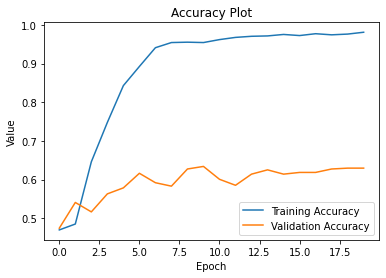

In [90]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

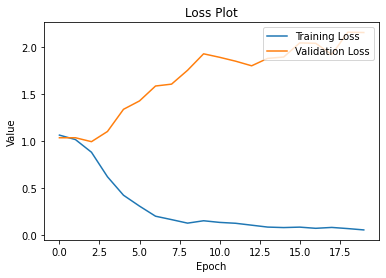

In [89]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()